In [10]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 



{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [11]:
import os

df = pd.DataFrame(X)
df['species'] = y


stats_values = df.groupby('species')['sepal width'].agg([ 
    lambda x: x.isnull().sum() , 'min', lambda x: x.quantile(0.25) , 'median' ,
    lambda x: x.quantile(0.75) , lambda x: x.quantile(0.95) , 'max', 'mean' , 
    lambda x: x.max() - x.min() , lambda x: x.quantile(0.75) - x.quantile(0.25) , lambda x: round(x.std(ddof=1), 3) , lambda x: round(np.sqrt(np.mean((x-np.mean(x))**2)),3) , lambda x: np.median(np.abs(x-np.median(x)))

])

stats_values.reset_index(inplace=True)
stats_values.columns = ['label', 'missing' , 'min', 'q1' , 'med' , 'q3' , 'p95' , 'max' , 'mean' , 'range' , 'iqr' , 'std' , 'std_pop' , 'mad']  


directory = '../dist'
if not os.path.exists(directory):
    os.makedirs(directory)

file_path = os.path.join(directory, 'statistics.csv')
stats_values.to_csv(file_path, index=False)

print(f"CSV saved at: {file_path}")

CSV saved at: ../dist\statistics.csv


In [12]:
import os
import pandas as pd

df = pd.DataFrame(X)

correlation_matrix = df.corr(method='pearson')

directory = '../dist'
if not os.path.exists(directory):
    os.makedirs(directory)

file_path = os.path.join(directory, 'correlation.csv')

correlation_matrix.to_csv(file_path, float_format='%.3f')

print(f"CSV saved at: {file_path}")

CSV saved at: ../dist\correlation.csv


In [14]:

df = pd.DataFrame(X, columns=iris.variables["name"])

correlation_matrix = df.corr(method='pearson')

absolute_correlation_matrix = correlation_matrix.abs()


min_corr = absolute_correlation_matrix.min().min()  
max_corr = absolute_correlation_matrix.max().max()  

print(f"Minimum Correlation: {min_corr:.3f}")
print(f"Maximum Correlation {max_corr:.3f}")

Minimum Correlation: 0.109
Maximum Correlation 1.000


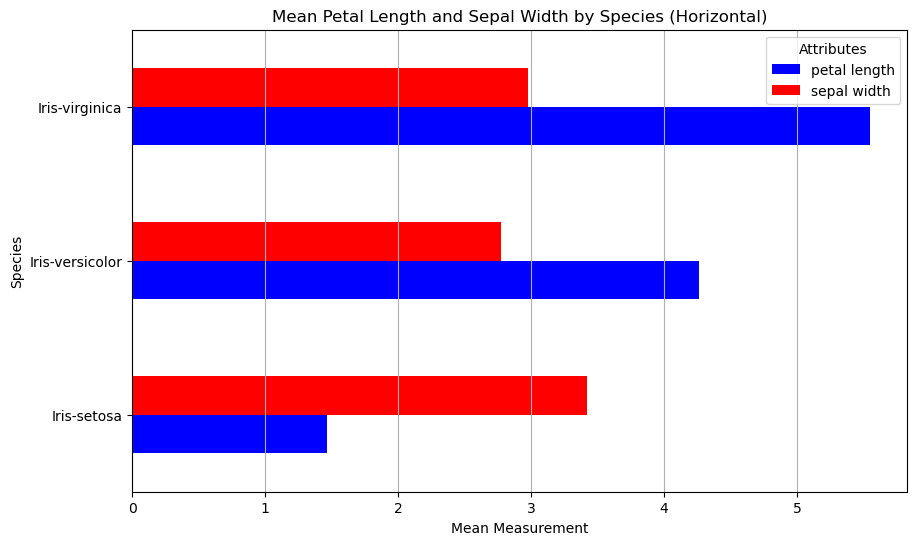

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris_df = pd.DataFrame(X, columns=iris.variables['name'])
iris_df['species'] = y

mean_values = iris_df.groupby('species')[['petal length', 'sepal width']].mean().reset_index()

mean_values.set_index('species', inplace=True)

mean_values.plot(kind='barh', figsize=(10, 6), color=['blue', 'red'])
plt.title('Mean Petal Length and Sepal Width by Species (Horizontal)')
plt.xlabel('Mean Measurement')
plt.ylabel('Species')
plt.grid(axis='x')
plt.legend(title='Attributes')
plt.show()


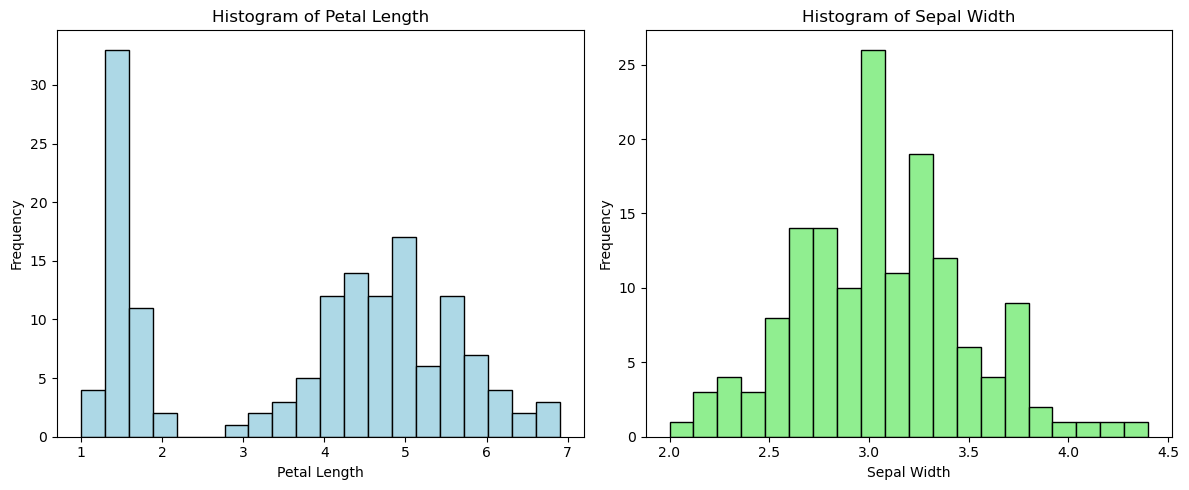

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset from scikit-learn
iris = load_iris()
X = iris.data
y = iris.target

# Convert the dataset into a DataFrame
df = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

# Extract petal length and sepal width
petal_length = df['petal length']
sepal_width = df['sepal width']

# Create a figure with two subplots for separate histograms
plt.figure(figsize=(12, 5))

# Histogram for Petal Length
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(petal_length, bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')

# Histogram for Sepal Width
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(sepal_width, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()


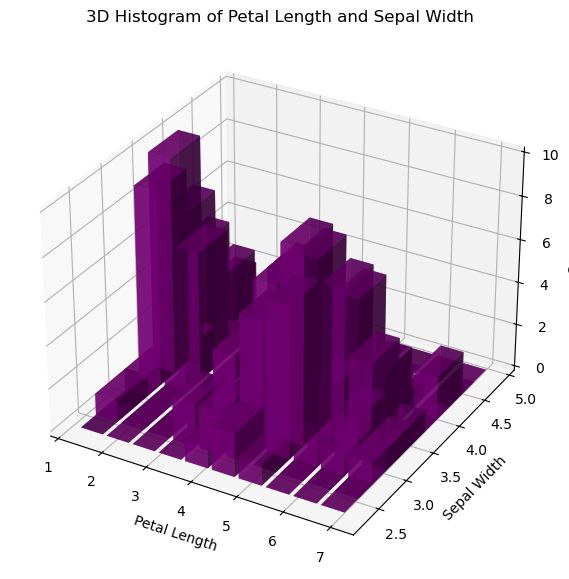

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ucimlrepo import fetch_ucirepo

# Fetch the Iris dataset
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

# Convert the data into a DataFrame
df = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

# Select the two features of interest
petal_length = df['petal length']
sepal_width = df['sepal width']

# Define the bin sizes
bins = (10, 10)  # 10 bins for petal length, 10 bins for sepal width

# Compute histogram data
hist, xedges, yedges = np.histogram2d(petal_length, sepal_width, bins=bins)

# Define positions of bars in 3D space
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Width and depth of bars
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

# Create a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D histogram as bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='purple', alpha=0.7)

# Set axis labels
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Count')
ax.set_title('3D Histogram of Petal Length and Sepal Width')

# Show plot
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12492\3622549248.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal length', data=iris_df, palette='viridis')
C:\Users\PC\AppData\Local\Temp\ipykernel_12492\3622549248.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal width', data=iris_df, palette='viridis')


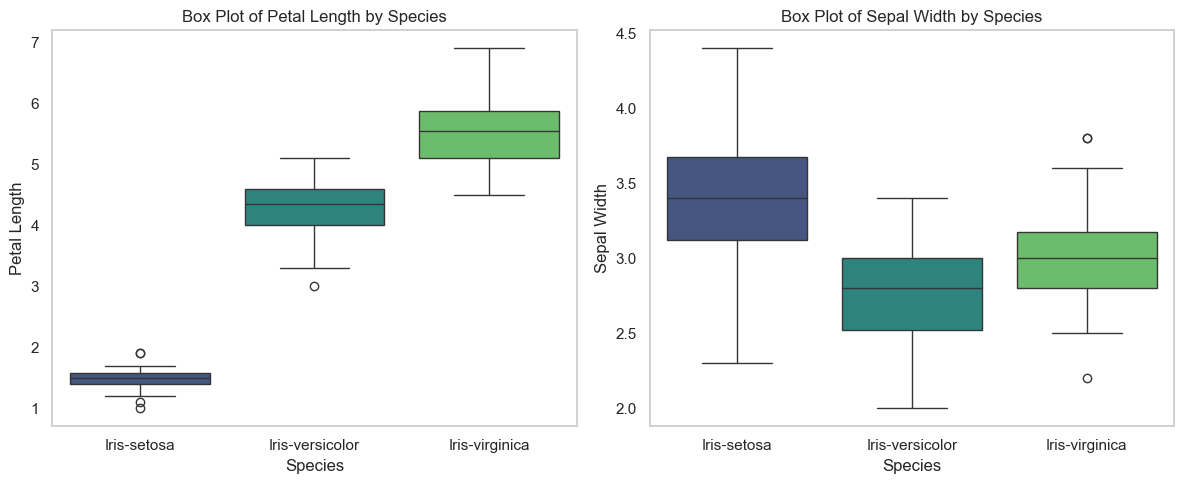

In [18]:
iris_df = pd.DataFrame(X, columns=iris.variables['name'])
iris_df['species'] = y

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Box Plot for Petal Length by Species
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='petal length', data=iris_df, palette='viridis')
plt.title('Box Plot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.grid(axis='y')

# 2. Box Plot for Sepal Width by Species
plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='sepal width', data=iris_df, palette='viridis')
plt.title('Box Plot of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.grid(axis='y')

plt.tight_layout()
plt.show()



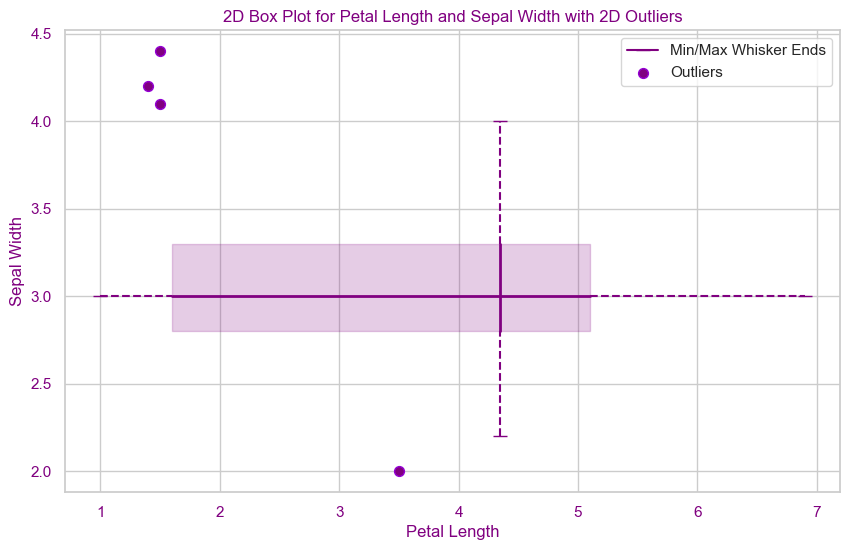

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch the Iris dataset
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

# Combine the features and target into a single DataFrame
df = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['species'] = y

# Petal Length and Sepal Width for the entire dataset
petal_length = df['petal length']
sepal_width = df['sepal width']

# Calculate statistical values for petal length and sepal width
length_q1, length_med, length_q3 = np.percentile(petal_length, [25, 50, 75])
width_q1, width_med, width_q3 = np.percentile(sepal_width, [25, 50, 75])

# Calculate IQR and bounds for outliers
iqr_length = length_q3 - length_q1
iqr_width = width_q3 - width_q1

# Whisker limits within 1.5 * IQR
length_whisker_min = max(petal_length[petal_length >= length_q1 - 1.5 * iqr_length].min(), length_q1 - 1.5 * iqr_length)
length_whisker_max = min(petal_length[petal_length <= length_q3 + 1.5 * iqr_length].max(), length_q3 + 1.5 * iqr_length)
width_whisker_min = max(sepal_width[sepal_width >= width_q1 - 1.5 * iqr_width].min(), width_q1 - 1.5 * iqr_width)
width_whisker_max = min(sepal_width[sepal_width <= width_q3 + 1.5 * iqr_width].max(), width_q3 + 1.5 * iqr_width)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the interquartile range (IQR) as a filled box
plt.fill_betweenx([width_q1, width_q3], length_q1, length_q3, color='purple', alpha=0.2)

# Plot the medians
plt.plot([length_q1, length_q3], [width_med, width_med], color='purple', linewidth=2)  # Horizontal median line
plt.plot([length_med, length_med], [width_q1, width_q3], color='purple', linewidth=2)  # Vertical median line

# Plot the whiskers as dashed lines
plt.plot([length_whisker_min, length_q1], [width_med, width_med], color='purple', linestyle='--')  # Left whisker
plt.plot([length_q3, length_whisker_max], [width_med, width_med], color='purple', linestyle='--')  # Right whisker

plt.plot([length_med, length_med], [width_whisker_min, width_q1], color='purple', linestyle='--')  # Bottom whisker
plt.plot([length_med, length_med], [width_q3, width_whisker_max], color='purple', linestyle='--')  # Top whisker

# Draw horizontal and vertical markers at min and max whisker ends
plt.plot(length_whisker_min, width_med, marker='_', color='purple', markersize=10, label="Min/Max Whisker Ends")
plt.plot(length_whisker_max, width_med, marker='_', color='purple', markersize=10)
plt.plot(length_med, width_whisker_min, marker='_', color='purple', markersize=10)
plt.plot(length_med, width_whisker_max, marker='_', color='purple', markersize=10)

# Identify and plot outliers
outliers = df[(petal_length < length_whisker_min) | (petal_length > length_whisker_max) |
              (sepal_width < width_whisker_min) | (sepal_width > width_whisker_max)]
plt.scatter(outliers['petal length'], outliers['sepal width'], color='purple', edgecolor='darkviolet', s=50, zorder=5, marker='o', label="Outliers")

# Add labels and title
plt.xlabel('Petal Length', color='purple')
plt.ylabel('Sepal Width', color='purple')
plt.title('2D Box Plot for Petal Length and Sepal Width with 2D Outliers', color='purple')

# Legend for clarity
plt.legend(loc='upper right')

# Change tick colors to purple
plt.tick_params(axis='x', colors='purple')
plt.tick_params(axis='y', colors='purple')

# Show plot
plt.show()



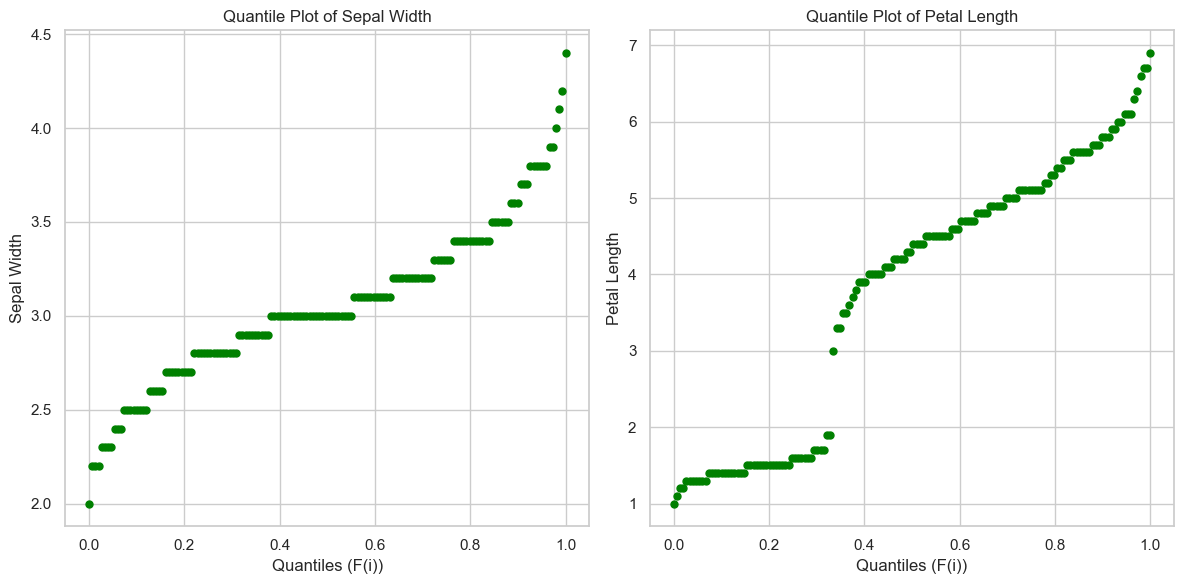

In [20]:
import numpy as np
import matplotlib.pyplot as plt


sepal_width = X['sepal width']
petal_length = X['petal length']

# تابع برای رسم Q Plot
def quantile_plot(data, feature_name):
    quantiles = np.linspace(0, 1, len(data))  # درصد تجمعی در بازه 0 تا 1
    sorted_data = np.sort(data)               
    
    plt.plot(quantiles, sorted_data, 'o', color='green', markersize=5)  
    plt.xlabel('Quantiles (F(i))')
    plt.ylabel(feature_name)
    plt.title(f'Quantile Plot of {feature_name}')

# رسم نمودارهای Q Plot برای دو ویژگی
plt.figure(figsize=(12, 6))

# Q Plot برای Sepal Width
plt.subplot(1, 2, 1)
quantile_plot(sepal_width, 'Sepal Width')

# Q Plot برای Petal Length
plt.subplot(1, 2, 2)
quantile_plot(petal_length, 'Petal Length')

plt.tight_layout()
plt.show()

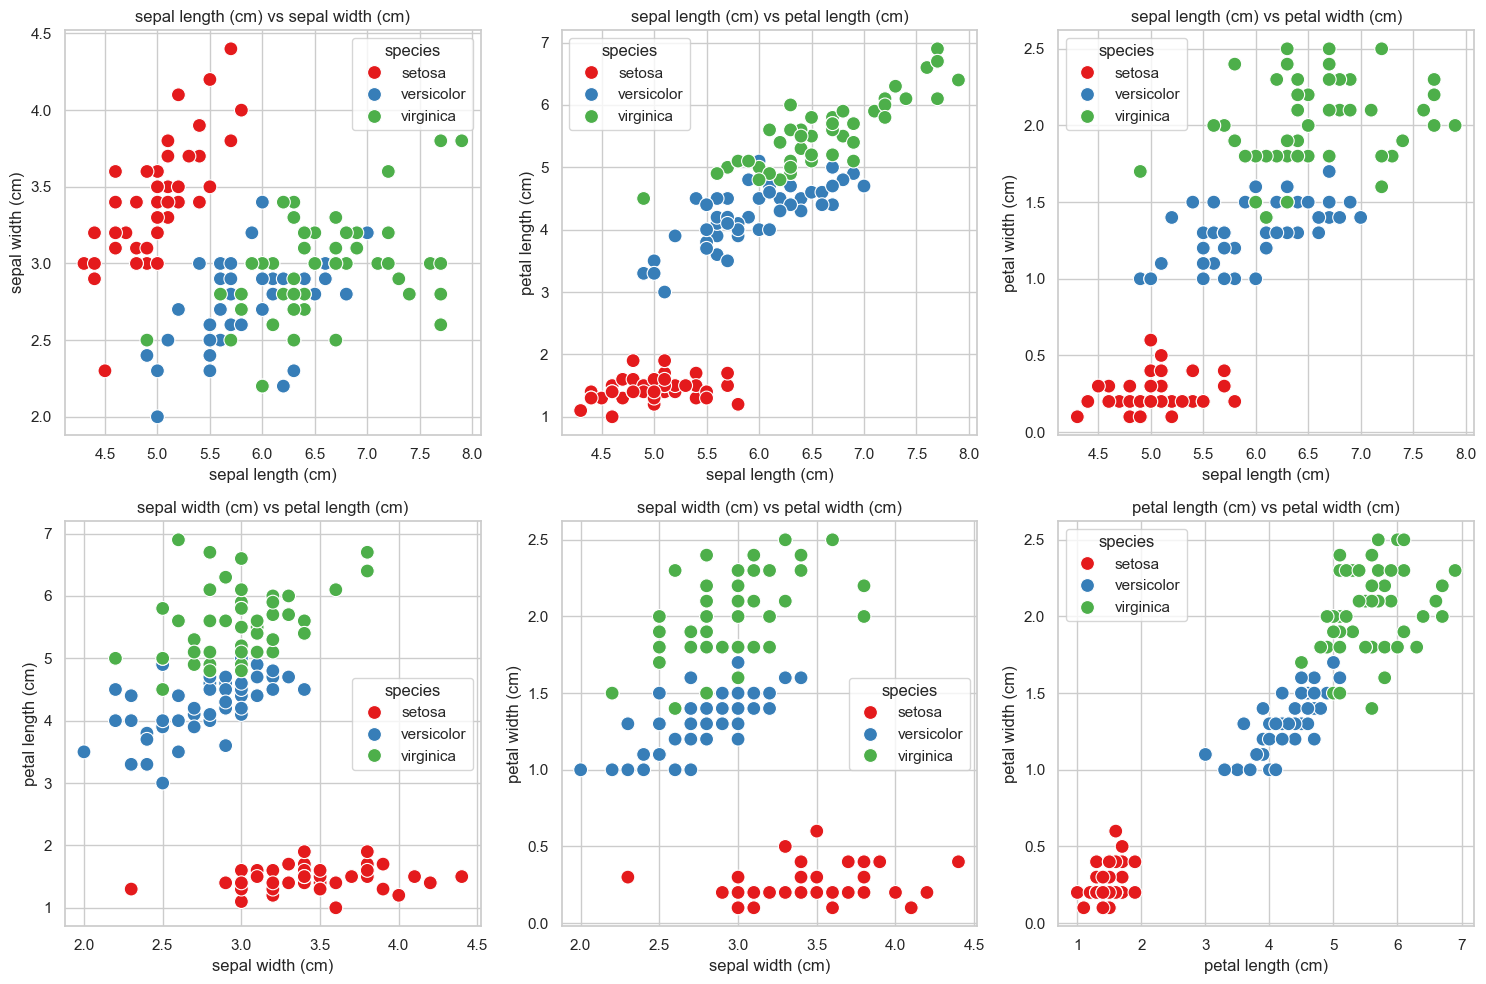

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris(as_frame=True)

# Convert the data into a DataFrame and add species as a new column
df = iris.frame
df['species'] = iris.target_names[iris.target]

# Define the feature pairs to plot
feature_pairs = [
    ('sepal length (cm)', 'sepal width (cm)'),
    ('sepal length (cm)', 'petal length (cm)'),
    ('sepal length (cm)', 'petal width (cm)'),
    ('sepal width (cm)', 'petal length (cm)'),
    ('sepal width (cm)', 'petal width (cm)'),
    ('petal length (cm)', 'petal width (cm)')
]

# Create a 2D scatter plot for each pair of features
plt.figure(figsize=(15, 10))

for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=x_feature, y=y_feature, hue='species', data=df, palette='Set1', s=100)
    plt.title(f'{x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

plt.tight_layout()
plt.show()

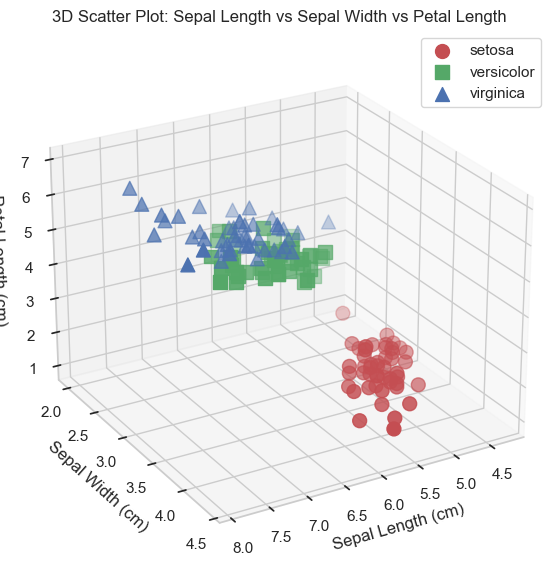

In [22]:
df = iris.frame
df['species'] = iris.target_names[iris.target]

# Create a 3D scatter plot with Sepal Length, Sepal Width, and Petal Length
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors and markers for each species
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
markers = {'setosa': 'o', 'versicolor': 's', 'virginica': '^'}  # Different markers for each species

# Plot each species with different colors and markers
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    ax.scatter(
        species_data['sepal length (cm)'],
        species_data['sepal width (cm)'],
        species_data['petal length (cm)'],
        c=colors[species],
        marker=markers[species],
        label=species,
        s=100
    )

# Set axis labels and title
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot: Sepal Length vs Sepal Width vs Petal Length')

# Add a legend to differentiate species
ax.legend()

# Adjust the viewing angle for better visualization
ax.view_init(elev=25, azim=60)

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


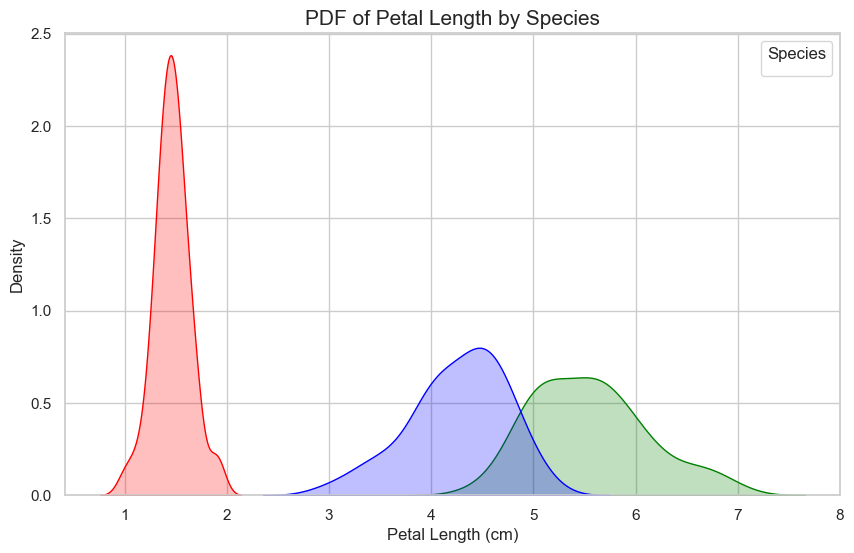

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(species_mapping)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='petal length (cm)', hue='species', fill=True, common_norm=False,  palette={'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'})

plt.title('PDF of Petal Length by Species', fontsize=15)
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Species')
plt.grid(True)
plt.show()